In [3]:
#Importo las bibliotecas para poder interactuar con la base de datos y cargarlas en mi dataset
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Definir los parámetros de conexión a la base de datos
host = 'localhost'
user = 'root'
password = 'Imroot69!'
db = 'vacunacioncovid'

# Crear una conexión a la base de datos
connection = pymysql.connect(host=host, user=user, password=password, db=db)
# Consultar datos y guardarlos en un dataset de Pandas
query = 'select * from ciudadano inner join aplicacion on ciudadano.dni = aplicacion.ciudadano inner join partida on partida.nrolote = aplicacion.partida'
df = pd.read_sql(query, connection)
connection.close() #cierro la conexion con la base de datos luego de cargar lo que necesito al dataset 
df.head()

C:\Users\Luciano\AppData\Local\Temp\ipykernel_28284\3523256270.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,dni,nombre,apellido,sexo,domicilio,enfermedadprexistente,fechanacimiento,profesion,dosisaplicadas,ciudadano,...,fechadeaplicacion,matriculavacunador,nrodosis,laboratorio,nrolote,fechadevencimieto,paisorigen,fechafabricacion,plantaorigen,cantidad
0,25570892,Eduardo,Weinzettel,M,PuntaAlta,1,1977-02-23,Alumno/a,3,25570892,...,2021-03-11,4097,1,Sinofarm,1,2025-12-31,China,2021-03-03,central,800
1,25570892,Eduardo,Weinzettel,M,PuntaAlta,1,1977-02-23,Alumno/a,3,25570892,...,2021-05-13,4097,2,Sinofarm,1,2025-12-31,China,2021-03-03,central,800
2,28133522,Soledad,Aramayo,F,BahiaBlanca,0,1980-05-26,Alumno/a,3,28133522,...,2021-08-07,117997,1,Sinofarm,1,2025-12-31,China,2021-03-03,central,800
3,28133522,Soledad,Aramayo,F,BahiaBlanca,0,1980-05-26,Alumno/a,3,28133522,...,2021-08-29,253539,2,Sinofarm,1,2025-12-31,China,2021-03-03,central,800
4,30243374,Gabriel,Huck,M,BahiaBlanca,0,1983-12-05,Investigador/a,2,30243374,...,2021-09-05,2595,2,Sinofarm,1,2025-12-31,China,2021-03-03,central,800


Una vez cargada la base de datos al dataset podemos proceder a analizar la información

In [4]:
df_flitrar=df.copy() # Creo una copá para pdoer trabajar y filtrar información. Es recomendable realizar esto en caso de tener un problema sabemos que podemos recurrir al dataset original donde cargamos la infromacion originalmente


Podemos calcular en promedio cuantas dosis de vacunas se colocaron

In [5]:
df_flitrar.drop_duplicates(subset=['dni'], keep='first',inplace=True) #me quedo con la primera vez q aparece el dni 
promedio_dosis=df_flitrar["dosisaplicadas"].mean().round() #redondeo al numero entero 
print("En promedio la gente se aplico un total de: ", promedio_dosis," dosis")
df_flitrar.info() #vemos que quedaron un total de 21 registros

En promedio la gente se aplico un total de:  3.0  dosis
<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 48
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dni                    21 non-null     int64 
 1   nombre                 21 non-null     object
 2   apellido               21 non-null     object
 3   sexo                   21 non-null     object
 4   domicilio              21 non-null     object
 5   enfermedadprexistente  21 non-null     object
 6   fechanacimiento        21 non-null     object
 7   profesion              21 non-null     object
 8   dosisaplicadas         21 non-null     int64 
 9   ciudadano              21 non-null     int64 
 10  partida                21 non-null     int64 
 11  fechadeaplicacion      21 non-null     object
 12  matriculavacunador     21 non-null     object
 13  nrodosis               21 non-null     int64 
 14  laboratorio            21

Puedo realizar un grafico de tortas para ver alguna ártociañrodad de la población estudiada. Por ejemplo su genero. Con este grafico podemos ver que la población elegida esta sesgada y apunta a que los datos obtenidos apuntan al sexo masculino.

sexo
M    17
F     4
Name: count, dtype: int64
4


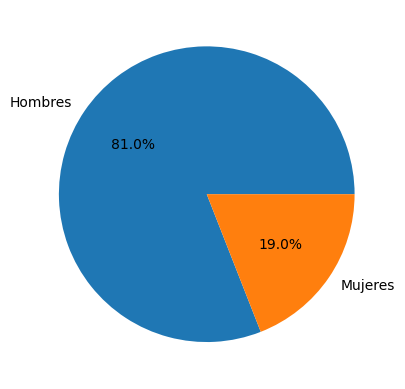

In [6]:
df_flitrar=df.copy() # Creo una copá para pdoer trabajar y filtrar información. Es recomendable realizar esto en caso de tener un problema sabemos que podemos recurrir al dataset original donde cargamos la infromacion originalmente
df_flitrar.drop_duplicates(subset=['dni'], keep='first',inplace=True) #me quedo con la primera vez q aparece el dni 
etiquetas=["Hombres","Mujeres"]
datos=[]
serie=df_flitrar["sexo"].value_counts()
datos.append(serie[0])
datos.append(serie[1])
print(serie)
print(serie[1])


plt.pie(datos, labels=etiquetas,  autopct='%1.1f%%')
plt.show()


Podriamos hacer un gráfico de barras con la cantidad de dosis aplicadas por mes. En este caso podemos ver como la cantidad de dosis aplicadas tuvo un pico maximo en agosto dentro de esta ppoblación 

mes_aplicación
1     5
2     4
3     1
4     1
5     6
6     7
7     7
8     8
9     6
10    3
11    3
12    5
Name: count, dtype: int64

['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

[5, 4, 1, 1, 6, 7, 7, 8, 6, 3, 3, 5]



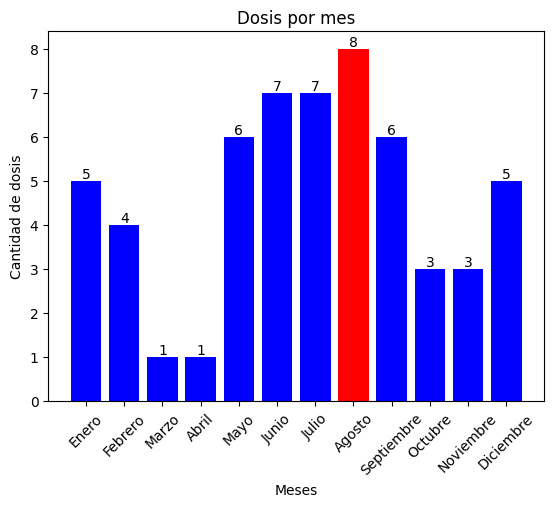

In [8]:
def obtener_mes_letras(mes): #transformo el numero del mes en su nombre
    if mes==1:
        mes="Enero"
    elif mes==2:
        mes="Febrero"
    elif mes==3:
        mes="Marzo"
    elif mes==4:
        mes="Abril"
    elif mes==5:
        mes="Mayo"
    elif mes==6:
        mes="Junio"
    elif mes==7:
        mes="Julio"
    elif mes==8:
        mes="Agosto"
    elif mes==9:
        mes="Septiembre"
    elif mes==10:
        mes="Octubre"
    elif mes==11:
        mes="Noviembre"
    elif mes==12:
        mes="Diciembre"
    return mes

def obtener_mes(fecha_obj): #obtengo el mes del datatime
    mes = fecha_obj.month
    return mes

df_flitrar=df.copy() # Creo una copá para pdoer trabajar y filtrar información. Es recomendable realizar esto en caso de tener un problema sabemos que podemos recurrir al dataset original donde cargamos la infromacion originalmente
df_flitrar["mes_aplicación"]=df_flitrar["fechadeaplicacion"].apply(obtener_mes) #agrego la columna con el mes 
datos=[]

serie=df_flitrar["mes_aplicación"].value_counts() #obtengo la serie de dosis por meses
serie=serie.sort_index() #La ordeno por mes segun su numero
datos.append(list(serie.keys())) #hago una lista con las keys (meses)
datos.append(list(serie.values)) #hago una lista con sus valores(cantidad)

meses = datos[0] #tomo la priumer lista de datos y la asigno a meses luego transformo los meses de numeros a su respectivo nombre
for i in range(len(meses)):
    meses[i]=obtener_mes_letras(meses[i])
dosis = datos[1] #tomo la segunda lista de datos y la coloco en la cantidad de dosis

print(serie)
print("")
print(meses)
print("")
print(dosis)
print("")
indice_max_dosis = dosis.index(max(dosis)) #para graficar de otro color el maximo
colores = ['blue'] * len(meses)
colores[indice_max_dosis] = 'red'


fig, ax = plt.subplots()
ax.bar(meses, dosis, color=colores)
ax.set(title="Dosis por mes", xlabel="Meses", ylabel="Cantidad de dosis")
# Agregamos el número de dosis encima de cada barra
for i, v in enumerate(dosis):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')
plt.xticks(rotation=45) # Rotar los nombres de los meses 90 grados
plt.show()


Dosis promedio por edad: promedio de dosis aplicadas para diferentes grupos de edad

edad
20    3
23    4
24    3
26    4
27    7
28    2
32    4
35    3
38    3
39    5
41    2
42    3
46    6
49    7
60    4
Name: dosisaplicadas, dtype: int64



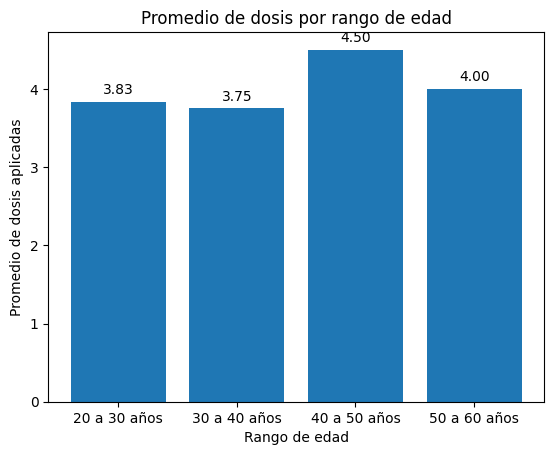

In [9]:
def calcular_edad(fecha_nacimiento):
    # Calculo la edad
    hoy = datetime.now()
    edad = hoy.year - fecha_nacimiento.year - ((hoy.month, hoy.day) < (fecha_nacimiento.month, fecha_nacimiento.day))

    return edad


df_flitrar=df.copy() # Creo una copá para pdoer trabajar y filtrar información. Es recomendable realizar esto en caso de tener un problema sabemos que podemos recurrir al dataset original donde cargamos la infromacion originalmente
df_flitrar["edad"]=df_flitrar["fechanacimiento"].apply(calcular_edad) #calculo la edad
df_flitrar.drop_duplicates(subset=['dni'], keep='first',inplace=True) #me quedo con la primera vez q aparece el dni
# agrupar por edad y sumar la cantidad de dosis
dosis_por_edad = df_flitrar.groupby('edad')['dosisaplicadas'].sum()
print(dosis_por_edad)
print("")

dosis_20a30 = dosis_por_edad.loc[(dosis_por_edad.index >= 20) & (dosis_por_edad.index < 30)] #creo una subserie
dosis_30a40 = dosis_por_edad.loc[(dosis_por_edad.index >= 30) & (dosis_por_edad.index < 40)] #creo una subserie
dosis_40a50 = dosis_por_edad.loc[(dosis_por_edad.index >= 40) & (dosis_por_edad.index < 50)] #creo una subserie
dosis_50a60 = dosis_por_edad.loc[(dosis_por_edad.index >= 50) & (dosis_por_edad.index <= 60)] #creo una subserie

rango=["20 a 30 años","30 a 40 años", "40 a 50 años","50 a 60 años"]
promedio_dosis=[dosis_20a30.mean(),dosis_30a40.mean(),dosis_40a50.mean(),dosis_50a60.mean()]

fig, ax = plt.subplots()
ax.bar(rango, promedio_dosis)
ax.set_xlabel('Rango de edad')
ax.set_ylabel('Promedio de dosis aplicadas')
ax.set_title('Promedio de dosis por rango de edad')
# Agregar el valor del promedio encima de cada barra
for i in range(len(promedio_dosis)):
    plt.text(i, promedio_dosis[i] + 0.1, f'{promedio_dosis[i]:.2f}', ha='center')
plt.show()


